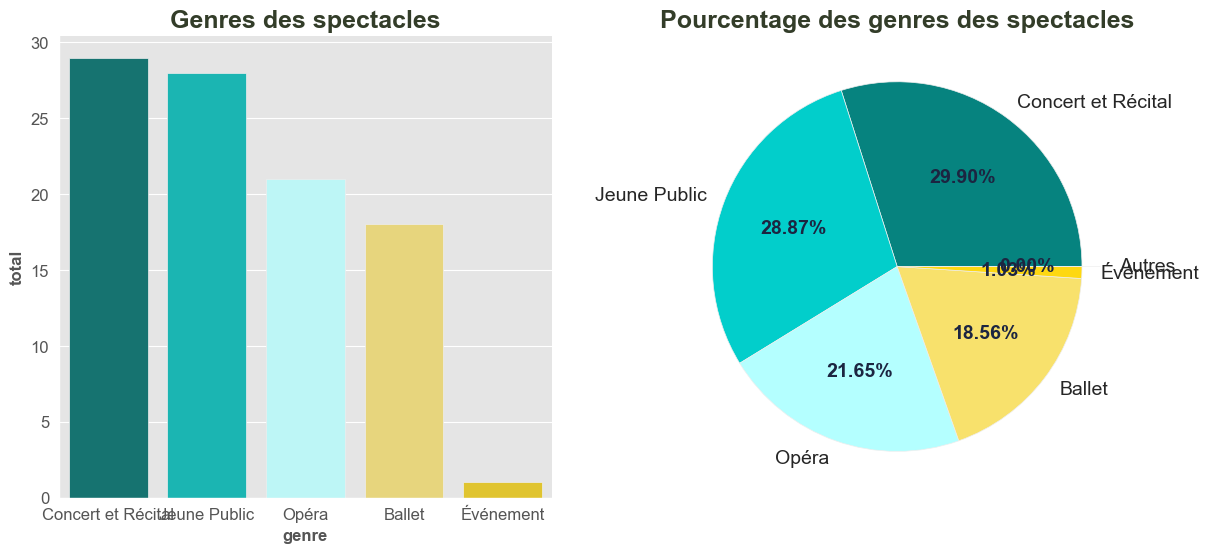

0                                                                                                                                                                                                   Lohengrin Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 7 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques)  et la partition, il pose les premiers jalons de son  drame musical  auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps e

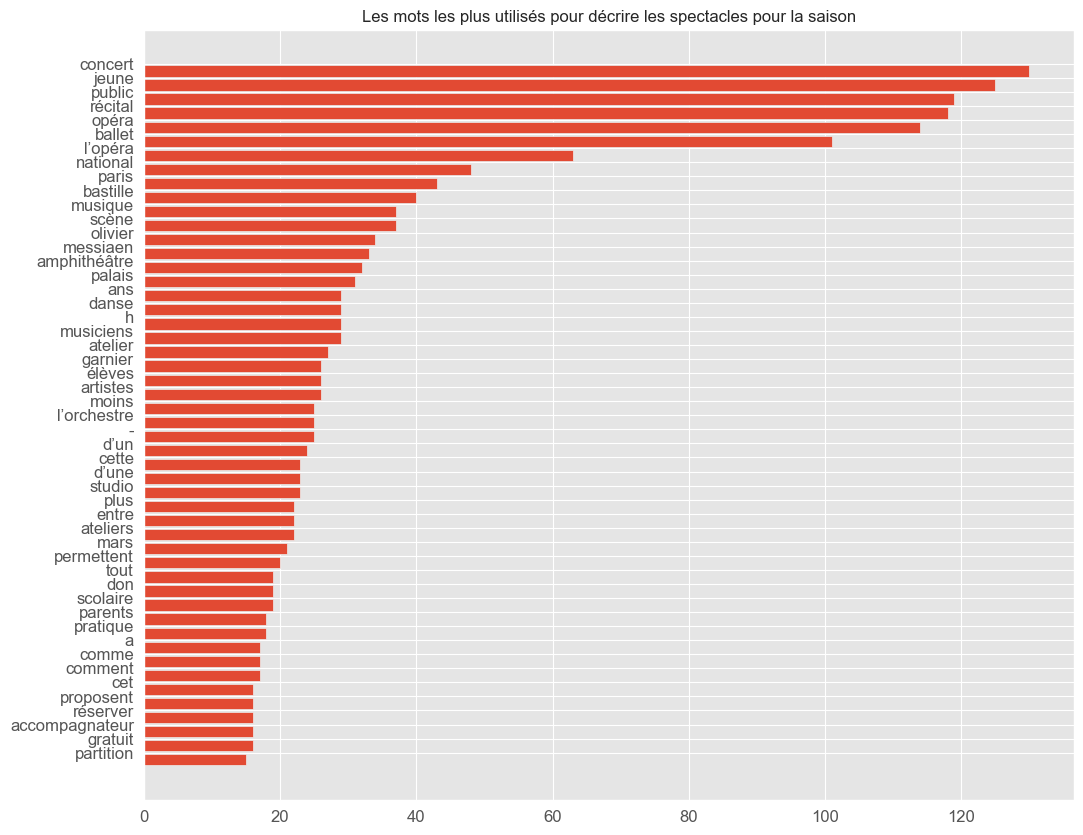

1.0
2.697594501718213


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
    get_ipython().run_line_magic('run', '-i data_exploration.ipynb')
finally:
    plt.close('all')


In [2]:
#Clean HTML tags into Description
def cleanHTML(data_html):
  clean_desc = BeautifulSoup(data_html, "lxml").text
  clean_desc = re.sub(r'[\'|\"|«|»|€|-|5|16|10|224]', '', clean_desc)
  return clean_desc

data['description'] = data['description'].apply(lambda x: cleanHTML(x))

data.head()

,id_show,title,description,genre,genre_improved,venue,auteur,url,genre_improved_multi,bag_of_words
0,1005,Lohengrin,"Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 37 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques) et la partition, il pose les premiers jalons de son drame musical auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps et les âmes.",Opéra,Opéra Opéra Opéra,Opéra Bastille,Richard Wagner,https://res.cloudinary.com/opera-national-de-paris/image/upload/c_crop%2ch_1406%2cw_1404%2cx_597%2cy_0/h_656%2cw_656/f_auto/v1/user_photos/x4cpt0xezxizxsjcsfzc,Opéra Opéra Opéra,"Lohengrin Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 7 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques) et la partition, il pose les premiers jalons de son drame musical auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps et les âmes. Opéra Opéra Opéra Opéra Opéra Bastille"
1,1006,Les Contes d'Hoffmann,"Dans une taverne, le poète Hoffmann, qui vient d’entendre chanter la diva Stella, raconte avant de la rejoindre l’histoire des trois femmes qu’il a aimées : Olympia, Antonia et Giulietta, trois amours contrecarrées par un mauvais génie, Lindorf. Sa passion pour Stella connaîtra-t-elle le même sort ? Avec cet opéra fantastique qui puise dans l’imaginaire de l’écrivain Ernst Theodor Amadeus Hoffmann, Jacques Offenbach espère démontrer qu’il n’est pas qu’un compositeur d’œuvres légères. Même inachevée en raison de sa mort en 88, la partition constitue un magnifique chant du cygne et regorge de pages célèbres comme la Barcarolle ou l’air de la Poupée. Robert Carsen, qui aime à représenter le théâtre dans le théâtre, plonge le spectateur dans l’univers d’un Opéra, de la scène aux coulisses, et questionne, par cette mise en abyme vertigineuse, les notions d’anti-héros et d’idéal féminin.",Opéra,Opéra Opéra Opéra,Opéra Bastille,Jacques Offenbach,NaN,Opéra Opéra Opéra,"Les Contes dHoffmann Dans une taverne, le poète Hoffmann, qui vient d’entendre chanter la diva Stella, raconte avant de la rejoindre l’histoire des trois femmes qu’il a aimées Olympia, Antonia et Giulietta, trois amours contrecarrées par un mauvais génie, Lindorf. Sa passion pour Stella connaîtra-t-elle le même sort Avec cet opéra fantastique qui puise dans l’imaginaire de l’écrivain Ernst Theodor Amadeus Hoffmann, Jacques Offenbach espère démontrer qu’il n’est pas qu’un compositeur d’œuvres légères. Même inachevée en raison de sa mort en 88, la partition constitue un magnifique chant du cygne et regorge de pages célèbres comme la Barcarolle ou l’air de la Poupée. Robert Carsen, qui aime à représenter le théâtre dans le théâtre, plonge le spectateur dans l’univers d’un Opéra, de la scène aux coulisses, et questionne, par cette mise en abyme vertigineuse, les notions d’anti-héros et d’idéal féminin. Opéra Opéra Opéra Opéra Opéra Bastille"
2,1007,Simon Boccanegra,"S’il n’es

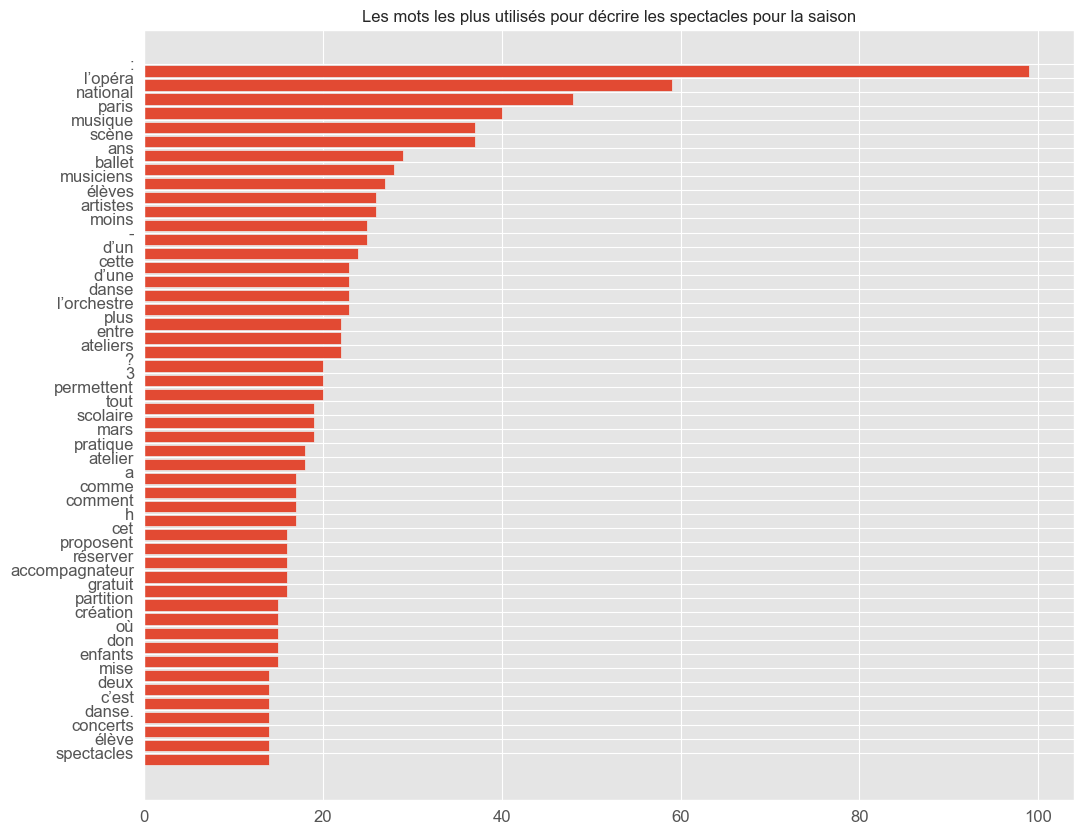

In [3]:
histo_popular_words(data['description'])

## Création d'un champ qui contient les principaux mots qui décrivent un spectacle

In [4]:
#If no description is given in the dataset, we cannot recommand it
data = data.dropna(subset=['description'], how='any')

#Create a bag of words composed with different features
data['bag_of_words'] = data[data.columns[1:5]].apply(lambda x: ' '.join(x), axis=1)

#TODO To improve model, add bag_of_words with auteur genre or venue repeating to give more weight
data['bag_of_words_improved'] = data[data.columns[1:5]].apply(lambda x: ' '.join(x), axis=1)

#we'll try to find similarities based on the Description Words of a show
#Field we want to check similarities
#data_similarities = data.title
data_similarities = data['bag_of_words']
X = np.array(data_similarities)

data.head()


,id_show,title,description,genre,genre_improved,venue,auteur,url,genre_improved_multi,bag_of_words,bag_of_words_improved
0,1005,Lohengrin,"Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 37 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques) et la partition, il pose les premiers jalons de son drame musical auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps et les âmes.",Opéra,Opéra Opéra Opéra,Opéra Bastille,Richard Wagner,https://res.cloudinary.com/opera-national-de-paris/image/upload/c_crop%2ch_1406%2cw_1404%2cx_597%2cy_0/h_656%2cw_656/f_auto/v1/user_photos/x4cpt0xezxizxsjcsfzc,Opéra Opéra Opéra,"Lohengrin Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 37 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques) et la partition, il pose les premiers jalons de son drame musical auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps et les âmes. Opéra Opéra Opéra Opéra","Lohengrin Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 37 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques) et la partition, il pose les premiers jalons de son drame musical auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps et les âmes. Opéra Opéra Opéra Opéra"
1,1006,Les Contes d'Hoffmann,"Dans une taverne, le poète Hoffmann, qui vient d’entendre chanter la diva Stella, raconte avant de la rejoindre l’histoire des trois femmes qu’il a aimées : Olympia, Antonia et Giulietta, trois amours contrecarrées par un mauvais génie, Lindorf. Sa passion pour Stella connaîtra-t-elle le même sort ? Avec cet opéra fantastique qui puise dans l’imaginaire de l’écrivain Ernst Theodor Amadeus Hoffmann, Jacques Offenbach espère démontrer qu’il n’est pas qu’un compositeur d’œuvres légères. Même inachevée en raison de sa mort en 88, la partition constitue un magnifique chant du cygne et regorge de pages célèbres comme la Barcarolle ou l’air de la Poupée. Robert Carsen, qui aime à représenter le théâtre dans le théâtre, plonge le spectateur dans l’univers d’un Opéra, de la scène aux coulisses, et questionne, par cette mise en abyme vertigineuse, les notions d’anti-héros et d’idéal féminin.",Opéra,Opéra Opéra Opéra,Opéra Bastille,Jacques Offenbach,NaN,Opéra Opéra Opéra,"Les Contes d'Hoffmann Dans une taverne, le poète Hoffmann, qui vient d’entendre chanter la diva Stella, raconte avant de la rejoindre l’hi

## Création d'un système de notation des spectacles en fonction des ventes de spectacles

In [5]:
def rating_to_show(total_purchase_by_product):
  if total_purchase_by_product in list(range(0,2)):
    return 1
  elif total_purchase_by_product in list(range(2,3)):
    return 2
  elif total_purchase_by_product in list(range(3,4)):
    return 3
  elif total_purchase_by_product in list(range(4,5)):
    return 4
  elif total_purchase_by_product >= 6:
    return 5
  else:
    return 0

In [6]:
data_ratings = pd.DataFrame(data_purchase)
data_ratings['rating'] = data_ratings['soldTickets'].apply(rating_to_show)

data_ratings.head()

,id_order,id_user,id_show,soldTickets,rating
0,0,1,1005,2,2
1,0,2,1005,2,2
2,0,2,1005,4,4
3,1,1,1006,2,2
4,2,2,1007,4,4


In [7]:
data_items = pd.DataFrame()

data_items['rating_count'] = data_ratings['id_show'].value_counts()
data_items['rating_average'] = data_ratings.groupby('id_show')['rating'].mean()

data_items.head()

,rating_count,rating_average
id_show,,
1005,3,2.666667
1064,1,2.000000
1103,1,2.000000
1102,1,2.000000
1101,1,2.000000


In [8]:
data_items_merge = data_items.merge(data, on='id_show', how='left')

data_items_merge.head()

,id_show,rating_count,rating_average,title,description,genre,genre_improved,venue,auteur,url,genre_improved_multi,bag_of_words,bag_of_words_improved
0,1005,3,2.666667,Lohengrin,"Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 37 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques) et la partition, il pose les premiers jalons de son drame musical auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps et les âmes.",Opéra,Opéra Opéra Opéra,Opéra Bastille,Richard Wagner,https://res.cloudinary.com/opera-national-de-paris/image/upload/c_crop%2ch_1406%2cw_1404%2cx_597%2cy_0/h_656%2cw_656/f_auto/v1/user_photos/x4cpt0xezxizxsjcsfzc,Opéra Opéra Opéra,"Lohengrin Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 37 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques) et la partition, il pose les premiers jalons de son drame musical auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps et les âmes. Opéra Opéra Opéra Opéra","Lohengrin Accusée d’avoir tué son frère, l’héritier du duché de Brabant, Elsa demande à être défendue par celui qu’elle a vu en rêve. Quand celui-ci apparaît, conduit par un cygne, il accepte à condition que jamais elle ne lui demande son nom. Richard Wagner a 37 ans quand il signe avec Lohengrin son opéra romantique à la musique magnétique. En écrivant lui-même le livret (inspiré de légendes germaniques) et la partition, il pose les premiers jalons de son drame musical auquel contribuent également un prélude, des leitmotiv, un orchestre et des chœurs amples. Le metteur en scène Kirill Serebrennikov, connu pour ses créations puissantes, fait ses débuts à l’Opéra national de Paris avec cette œuvre qu’il éclaire d’une lumière sombre par une réflexion sur la guerre, machine à broyer les corps et les âmes. Opéra Opéra Opéra Opéra"
1,1064,1,2.000000,Don Quichotte,"Inspiré de la chorégraphie de Marius Petipa, Don Quichotte de Rudolf Noureev est une véritable fête de la danse aux accents espagnols. Les solistes et le Corps de Ballet sont emportés dans des ensembles et pas de deux au son d’une musique enlevée. Écrit au XVIIe siècle, le roman de Cervantès raconte les aventures de Don Quichotte, un idéaliste qui vit dans les livres et qui décide un jour de cavaler à travers l’Espagne aux côtés du naïf Sancho Pança. Dans le ballet de Noureev, ils rencontrent Kitri et Basilio. Ces deux amants emploient toutes les ruses – du spectacle de guignol au faux suicide – pour se retrouver malgré la résistance du père de Kitri. C’est finalement Don Quichotte qui amène l’heureux dénouement après avoir lutté contre les moulins à vent et croisé la route de Cupidon, Dulcinée et la Reine des dryades. Les costumes et les décors chatoyants subliment une œuvre vive et réjouissante.",Ballet,Ballet Ballet Ballet,Opéra Bastille,NaN,NaN,Ballet Ballet Ballet,"Don Quichotte Inspiré de la chorégraphie de Marius Petipa, Don Quichotte de Rudolf Nour

In [9]:
#Calculate the number of votes garnered by the 80th percentile show
m = data_items_merge['rating_count'].quantile(0.80)
print(m)
C = data_items_merge['rating_average'].mean()
print (C)

# Function to compute the shows weighted rating for each show
def weighted_rating(x, m=m, C=C):
    v = x['rating_count']
    R = x['rating_average']
    # Compute the weighted score
    return (v/(v+m) * R) + (m/(m+v) * C)

1.0
2.697594501718213


In [10]:
# Compute the score using the weighted_rating function defined above
data_items_merge['score'] = data_items_merge.apply(weighted_rating, axis=1)

data_items_merge = data_items_merge.sort_values('score', ascending=False)

data_items_merge.head()

,id_show,rating_count,rating_average,title,description,genre,genre_improved,venue,auteur,url,genre_improved_multi,bag_of_words,bag_of_words_improved,score
55,1026,1,5.0,La Vestale,"Une prêtresse du temple de Vesta, Julia, est partagée entre ses devoirs religieux et son amour pour le général romain Licinius. Tel est le nœud de La Vestale, l’opéra de Gaspare Spontini, écrit au début du Premier Empire. Dédiée à Joséphine et multipliant les allusions politiques à Napoléon, l’œuvre connaît un triomphe dès sa création à l’Opéra de Paris en 87. Admirée par Berlioz, la partition déploie une orchestration brillante et une vocalité au lyrisme soutenu qui annonce le grand opéra tout en s’inscrivant dans l’héritage de Gluck. Après avoir quitté l’affiche de l’Opéra de Paris pendant près de ans, le retour de cette œuvre dans sa version originale en français est un événement attendu. Lydia Steier, qui en signe la mise en scène, explore les thèmes de l’extrémisme religieux et du zèle militariste : l’amour a-t-il une chance de survivre entre ces deux pôles impitoyables ?",Opéra,Opéra Opéra Opéra,Opéra Bastille,NaN,https://res.cloudinary.com/opera-national-de-paris/image/upload/c_crop%2ch_1406%2cw_1404%2cx_1096%2cy_0/c_fill%2ch_704%2cw_610/f_auto/v1/user_photos/zyd5xxalqhlxhr3khlen,Opéra Opéra Opéra,"La Vestale Une prêtresse du temple de Vesta, Julia, est partagée entre ses devoirs religieux et son amour pour le général romain Licinius. Tel est le nœud de La Vestale, l’opéra de Gaspare Spontini, écrit au début du Premier Empire. Dédiée à Joséphine et multipliant les allusions politiques à Napoléon, l’œuvre connaît un triomphe dès sa création à l’Opéra de Paris en 87. Admirée par Berlioz, la partition déploie une orchestration brillante et une vocalité au lyrisme soutenu qui annonce le grand opéra tout en s’inscrivant dans l’héritage de Gluck. Après avoir quitté l’affiche de l’Opéra de Paris pendant près de ans, le retour de cette œuvre dans sa version originale en français est un événement attendu. Lydia Steier, qui en signe la mise en scène, explore les thèmes de l’extrémisme religieux et du zèle militariste : l’amour a-t-il une chance de survivre entre ces deux pôles impitoyables ? Opéra Opéra Opéra Opéra","La Vestale Une prêtresse du temple de Vesta, Julia, est partagée entre ses devoirs religieux et son amour pour le général romain Licinius. Tel est le nœud de La Vestale, l’opéra de Gaspare Spontini, écrit au début du Premier Empire. Dédiée à Joséphine et multipliant les allusions politiques à Napoléon, l’œuvre connaît un triomphe dès sa création à l’Opéra de Paris en 87. Admirée par Berlioz, la partition déploie une orchestration brillante et une vocalité au lyrisme soutenu qui annonce le grand opéra tout en s’inscrivant dans l’héritage de Gluck. Après avoir quitté l’affiche de l’Opéra de Paris pendant près de ans, le retour de cette œuvre dans sa version originale en français est un événement attendu. Lydia Steier, qui en signe la mise en scène, explore les thèmes de l’extrémisme religieux et du zèle militariste : l’amour a-t-il une chance de survivre entre ces deux pôles impitoyables ? Opéra Opéra Opéra Opéra",3.848797
86,1040,1,5.0,Marion Motin / Xie Xin / Crystal Pite,"Trois femmes chorégraphes sont à l’honneur de ce programme de danse contemporaine. Créé en à l’Opéra national de Paris, The Seasons’ Canon de Crystal Pite baigne dans une lumière d’orage. Bouleversante, la chorégraphie en canons déploie des réactions en chaîne, des gestes en écho. Un fourmillement organique de corps humains se mêle aux cordes de Vivaldi magnifiées par l’électronique de Max Richter. Dans The Last Call, sa première création pour le Ballet de l’Opéra, Marion Motin raconte l’histoire d’un coup de téléphone qui vient bouleverser la vie d’un homme. Entre distorsion et vitalité, la chorégraphie plonge les spectateurs dans une dimension surnaturelle. Enfin, l’artiste chinoise Xie Xin signe à son tour sa première création pour les danseurs de l’Opéra national de 

In [11]:
def predict_shows(data, id_show, nb_results):
    data = data.iloc[:nb_results]
    data = data[data['id_show'] != id_show]
    return data

#10005 = Lohengrin
predict = predict_shows(data_items_merge, 1005, 3)
predict

,id_show,rating_count,rating_average,title,description,genre,genre_improved,venue,auteur,url,genre_improved_multi,bag_of_words,bag_of_words_improved,score
55,1026,1,5.0,La Vestale,"Une prêtresse du temple de Vesta, Julia, est partagée entre ses devoirs religieux et son amour pour le général romain Licinius. Tel est le nœud de La Vestale, l’opéra de Gaspare Spontini, écrit au début du Premier Empire. Dédiée à Joséphine et multipliant les allusions politiques à Napoléon, l’œuvre connaît un triomphe dès sa création à l’Opéra de Paris en 87. Admirée par Berlioz, la partition déploie une orchestration brillante et une vocalité au lyrisme soutenu qui annonce le grand opéra tout en s’inscrivant dans l’héritage de Gluck. Après avoir quitté l’affiche de l’Opéra de Paris pendant près de ans, le retour de cette œuvre dans sa version originale en français est un événement attendu. Lydia Steier, qui en signe la mise en scène, explore les thèmes de l’extrémisme religieux et du zèle militariste : l’amour a-t-il une chance de survivre entre ces deux pôles impitoyables ?",Opéra,Opéra Opéra Opéra,Opéra Bastille,NaN,https://res.cloudinary.com/opera-national-de-paris/image/upload/c_crop%2ch_1406%2cw_1404%2cx_1096%2cy_0/c_fill%2ch_704%2cw_610/f_auto/v1/user_photos/zyd5xxalqhlxhr3khlen,Opéra Opéra Opéra,"La Vestale Une prêtresse du temple de Vesta, Julia, est partagée entre ses devoirs religieux et son amour pour le général romain Licinius. Tel est le nœud de La Vestale, l’opéra de Gaspare Spontini, écrit au début du Premier Empire. Dédiée à Joséphine et multipliant les allusions politiques à Napoléon, l’œuvre connaît un triomphe dès sa création à l’Opéra de Paris en 87. Admirée par Berlioz, la partition déploie une orchestration brillante et une vocalité au lyrisme soutenu qui annonce le grand opéra tout en s’inscrivant dans l’héritage de Gluck. Après avoir quitté l’affiche de l’Opéra de Paris pendant près de ans, le retour de cette œuvre dans sa version originale en français est un événement attendu. Lydia Steier, qui en signe la mise en scène, explore les thèmes de l’extrémisme religieux et du zèle militariste : l’amour a-t-il une chance de survivre entre ces deux pôles impitoyables ? Opéra Opéra Opéra Opéra","La Vestale Une prêtresse du temple de Vesta, Julia, est partagée entre ses devoirs religieux et son amour pour le général romain Licinius. Tel est le nœud de La Vestale, l’opéra de Gaspare Spontini, écrit au début du Premier Empire. Dédiée à Joséphine et multipliant les allusions politiques à Napoléon, l’œuvre connaît un triomphe dès sa création à l’Opéra de Paris en 87. Admirée par Berlioz, la partition déploie une orchestration brillante et une vocalité au lyrisme soutenu qui annonce le grand opéra tout en s’inscrivant dans l’héritage de Gluck. Après avoir quitté l’affiche de l’Opéra de Paris pendant près de ans, le retour de cette œuvre dans sa version originale en français est un événement attendu. Lydia Steier, qui en signe la mise en scène, explore les thèmes de l’extrémisme religieux et du zèle militariste : l’amour a-t-il une chance de survivre entre ces deux pôles impitoyables ? Opéra Opéra Opéra Opéra",3.848797
86,1040,1,5.0,Marion Motin / Xie Xin / Crystal Pite,"Trois femmes chorégraphes sont à l’honneur de ce programme de danse contemporaine. Créé en à l’Opéra national de Paris, The Seasons’ Canon de Crystal Pite baigne dans une lumière d’orage. Bouleversante, la chorégraphie en canons déploie des réactions en chaîne, des gestes en écho. Un fourmillement organique de corps humains se mêle aux cordes de Vivaldi magnifiées par l’électronique de Max Richter. Dans The Last Call, sa première création pour le Ballet de l’Opéra, Marion Motin raconte l’histoire d’un coup de téléphone qui vient bouleverser la vie d’un homme. Entre distorsion et vitalité, la chorégraphie plonge les spectateurs dans une dimension surnaturelle. Enfin, l’artiste chinoise Xie Xin signe à son tour sa première création pour les danseurs de l’Opéra national de 